# YouTube Video Performance Analysis for Netflix India

---

## Introduction to the Dataset

This project is based on a dataset extracted from YouTube, specifically focusing on videos related to Netflix India. The dataset contains various meta-information about each video, including video ID, title, description, tags, view count, like count, comment count, published date, duration, and more. This dataset provides a comprehensive look at the performance and engagement of Netflix India's content on the YouTube platform.

### Key Columns in the Dataset:
- **Video ID**: A unique identifier for each video.
- **Title**: The title of the YouTube video.
- **Description**: A brief overview or summary of the video content.
- **Tags**: Keywords associated with the video, helping categorize the video for better discoverability.
- **Published Date**: The date and time the video was published on YouTube.
- **View Count**: The total number of views the video has received.
- **Like Count**: The number of likes the video has garnered.
- **Comment Count**: The number of comments the video has received.
- **Duration**: The length of the video, provided in ISO 8601 format (e.g., PT26M12S).

---

## Why We Are Analyzing This Dataset

The goal of this analysis is to explore the performance of Netflix India's YouTube content, uncover patterns in viewer engagement, and derive actionable insights to improve future content strategy. By analyzing key metrics such as view count, like count, and comment count, we can determine what factors contribute to the success or failure of a video.

### We Will Explore the Following Aspects:
1. **Identifying Trends**: Are there any clear patterns in video performance? Do certain tags, durations, or titles lead to higher engagement?
2. **Engagement Analysis**: Does the number of views correlate with likes and comments? What factors are likely to boost these engagement metrics?
3. **Content Strategy**: How can Netflix India leverage this data to optimize their video production and posting strategies?
4. **Content Popularity**: Which videos are performing the best, and what common characteristics do they share?

By the end of this analysis, we aim to provide Netflix India with valuable insights into how their YouTube videos perform and suggest strategies to maximize viewer engagement and reach.


 ## Import all necessary libraries

In [43]:
# Basic libraries
import pandas as pd
import numpy as np

# For handling date and time
from datetime import datetime, timedelta

# Visualization libraries (for later, after cleaning)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting options for better display
pd.set_option('display.max_columns', None)


## Load the data and explore

In [44]:
# Load the dataset
df = pd.read_csv('netflix_india_yt_data.csv')

In [45]:
# Preview the first 5 rows
print(df.head())

      video_id                                              title  \
0  KQ2a4uawQBo  Meet THE REAL Honey Singh | Yo Yo Honey Singh:...   
1  bOR7S0j_wq8  ⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...   
2  GRM8Q-1fVJ0  Black Warrant | Official Teaser | Vikramaditya...   
3  b0b8WBglCHo  The Electric State | Official Trailer | Netfli...   
4  QCPOl_7cdnQ  The Electric State | Official Trailer | Hindi ...   

                                         description  \
0  Honey Singh shares his battles with mental hea...   
1  Brb taking notes on how to lie like a pro 👀\r\...   
2  India ki sabse khatarnaak jail mein, ek naya j...   
3  In the aftermath of the robot war, the only pa...   
4  In the aftermath of the robot war, the only pa...   

                                                tags           publishedAt  \
0  ['angreji beat', 'dope shope', 'honey singh', ...  2024-12-20T08:00:00Z   
1  ['aditya seal', 'akshay kumar', 'akshay kumar ...  2024-12-19T12:30:00Z   
2  ['netflix i

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_id              5198 non-null   object 
 1   title                 5198 non-null   object 
 2   description           5191 non-null   object 
 3   tags                  5177 non-null   object 
 4   publishedAt           5198 non-null   object 
 5   thumbnails            5198 non-null   object 
 6   liveBroadcastContent  5198 non-null   object 
 7   viewCount             5198 non-null   int64  
 8   likeCount             5197 non-null   float64
 9   commentCount          5191 non-null   float64
 10  duration              5198 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 446.8+ KB


In [47]:
# Get descriptive statistics for numeric columns
df.describe()

,viewCount,likeCount,commentCount
count,5.198000e+03,5.197000e+03,5191.000000
mean,2.154679e+06,2.635686e+04,654.778463
std,1.794774e+07,9.341496e+04,2021.089963
min,0.000000e+00,1.200000e+01,0.000000
25%,5.890825e+04,1.245000e+03,43.000000
50%,2.210810e+05,4.499000e+03,144.000000
75%,9.379675e+05,1.930900e+04,507.500000
max,8.883307e+08,3.192608e+06,59038.000000


## Cleaning Step 1: Null values check and handling

In [49]:
# Check for null values in each column
print(df.isnull().sum())


video_id                 0
title                    0
description              7
tags                    21
publishedAt              0
thumbnails               0
liveBroadcastContent     0
viewCount                0
likeCount                1
commentCount             7
duration                 0
dtype: int64


In [50]:
# Check duplicate rows
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


## Feature Engineering

#### Step 1: Create TagsCount column

In [51]:
# Function to count number of tags
def count_tags(tags):
    if pd.isna(tags) or tags == '[]':
        return 0
    try:
        # Convert string to list if not already
        tag_list = eval(tags) if isinstance(tags, str) else tags
        return len(tag_list)
    except:
        return 0

# Apply the function to create a new column
df['TagsCount'] = df['tags'].apply(count_tags)


#### Step 2: Convert duration into seconds

In [52]:
import re

# Function to convert ISO 8601 duration to seconds
def duration_to_seconds(duration):
    if pd.isna(duration):
        return 0
    
    # Use regex to extract hours, minutes, and seconds
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not match:
        return 0

    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0

    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

# Apply to create a new column
df['DurationSeconds'] = df['duration'].apply(duration_to_seconds)


#### Step 3: Create Category (Short / Long video)

In [53]:
# Function to classify based on duration
def categorize_video(seconds):
    return 'Short' if seconds < 60 else 'Long'

# Apply to create a new Category column
df['Category'] = df['DurationSeconds'].apply(categorize_video)


In [54]:
df.head()

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration,TagsCount,DurationSeconds,Category
0,KQ2a4uawQBo,Meet THE REAL Honey Singh | Yo Yo Honey Singh:...,Honey Singh shares his battles with mental hea...,"['angreji beat', 'dope shope', 'honey singh', ...",2024-12-20T08:00:00Z,{'default': {'url': 'https://i.ytimg.com/vi/KQ...,none,52864,7111.0,394.0,PT1M11S,19,71,Long
1,bOR7S0j_wq8,⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...,Brb taking notes on how to lie like a pro 👀\r\...,"['aditya seal', 'akshay kumar', 'akshay kumar ...",2024-12-19T12:30:00Z,{'default': {'url': 'https://i.ytimg.com/vi/bO...,none,44300,642.0,30.0,PT3M2S,23,182,Long
2,GRM8Q-1fVJ0,Black Warrant | Official Teaser | Vikramaditya...,"India ki sabse khatarnaak jail mein, ek naya j...","['netflix india', 'netflix', 'netflix shows', ...",2024-12-19T05:30:10Z,{'default': {'url': 'https://i.ytimg.com/vi/GR...,none,201087,3300.0,101.0,PT1M15S,30,75,Long
3,b0b8WBglCHo,The Electric State | Official Trailer | Netfli...,"In the aftermath of the robot war, the only pa...","['AGBO', 'Action', 'Adventure', 'Anthony Russo...",2024-12-18T14:30:00Z,{'default': {'url': 'https://i.ytimg.com/vi/b0...,none,19642,354.0,25.0,PT1M44S,20,104,Long
4,QCPOl_7cdnQ,The Electric State | Official Trailer | Hindi ...,"In the aftermath of the robot war, the only pa...","['AGBO', 'Netflix', 'Netflix पर क्या देखना चाह...",2024-12-18T13:30:05Z,{'default': {'url': 'https://i.ytimg.com/vi/QC...,none,117292,3455.0,130.0,PT1M41S,20,101,Long


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_id              5198 non-null   object 
 1   title                 5198 non-null   object 
 2   description           5191 non-null   object 
 3   tags                  5177 non-null   object 
 4   publishedAt           5198 non-null   object 
 5   thumbnails            5198 non-null   object 
 6   liveBroadcastContent  5198 non-null   object 
 7   viewCount             5198 non-null   int64  
 8   likeCount             5197 non-null   float64
 9   commentCount          5191 non-null   float64
 10  duration              5198 non-null   object 
 11  TagsCount             5198 non-null   int64  
 12  DurationSeconds       5198 non-null   int64  
 13  Category              5198 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 568.7+ KB


In [56]:
df.describe()

,viewCount,likeCount,commentCount,TagsCount,DurationSeconds
count,5.198000e+03,5.197000e+03,5191.000000,5198.000000,5198.000000
mean,2.154679e+06,2.635686e+04,654.778463,18.493844,271.532897
std,1.794774e+07,9.341496e+04,2021.089963,8.314268,601.227538
min,0.000000e+00,1.200000e+01,0.000000,0.000000,0.000000
25%,5.890825e+04,1.245000e+03,43.000000,13.000000,84.000000
50%,2.210810e+05,4.499000e+03,144.000000,20.000000,134.000000
75%,9.379675e+05,1.930900e+04,507.500000,24.000000,211.000000
max,8.883307e+08,3.192608e+06,59038.000000,48.000000,10285.000000


## Mini EDA (Quick Visual Insights)

#### Top 10 Most Viewed Videos

C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\1721160162.py:9: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.tight_layout()
C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\1721160162.py:9: UserWarning: Glyph 129684 (\N{DIYA LAMP}) missing from current font.
  plt.tight_layout()
C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129684 (\N{DIYA LAMP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


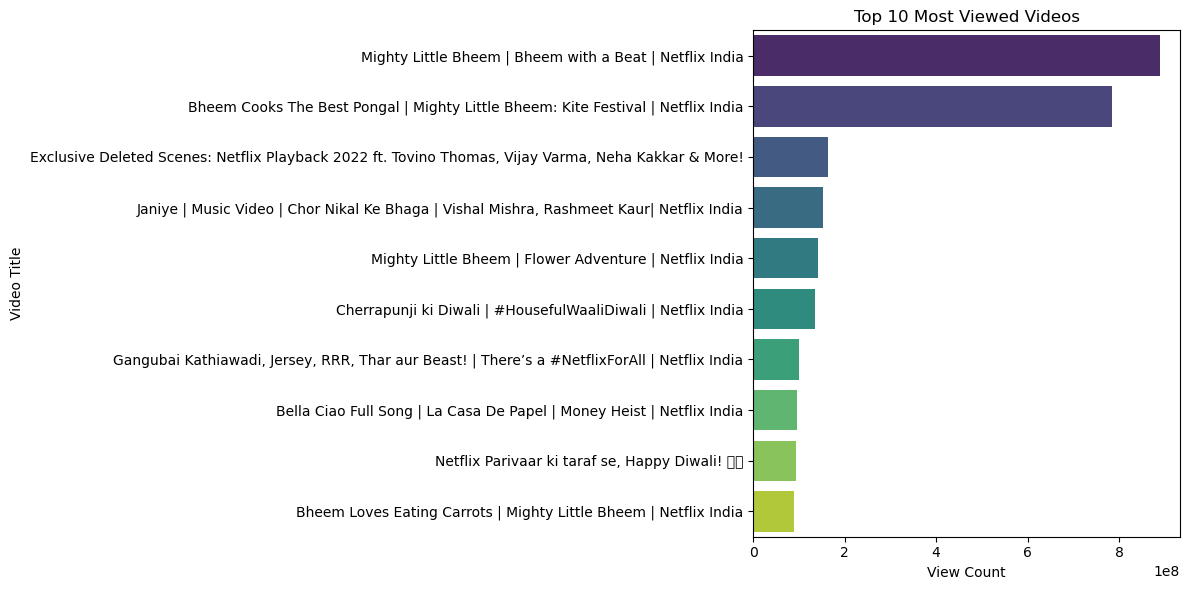

In [57]:
# Top 10 videos by viewCount
top_viewed = df.sort_values('viewCount', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_viewed, x='viewCount', y='title', palette='viridis')
plt.title('Top 10 Most Viewed Videos')
plt.xlabel('View Count')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()


#### TagsCount Distribution

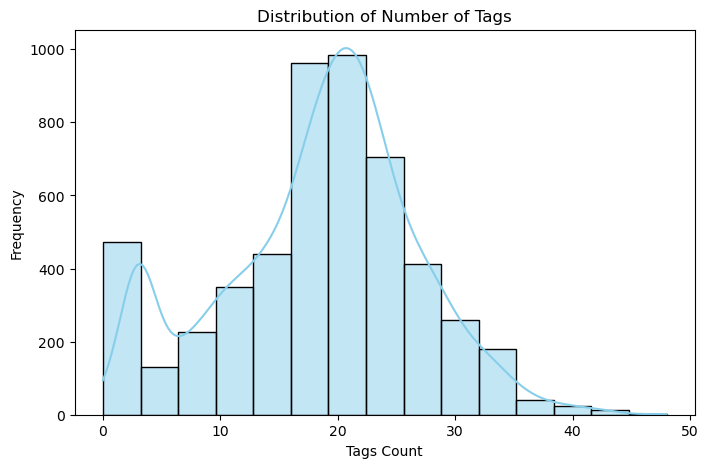

In [58]:
# Distribution of TagsCount
plt.figure(figsize=(8,5))
sns.histplot(df['TagsCount'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Number of Tags')
plt.xlabel('Tags Count')
plt.ylabel('Frequency')
plt.show()


#### DurationSeconds Distribution

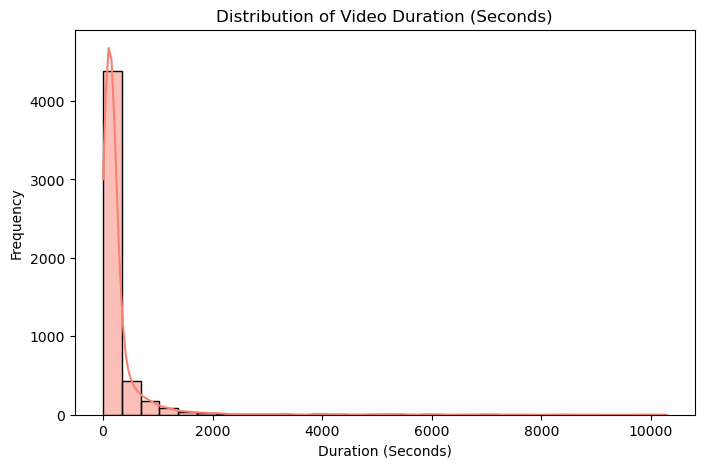

In [59]:
# Distribution of Video Durations (in seconds)
plt.figure(figsize=(8,5))
sns.histplot(df['DurationSeconds'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Video Duration (Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()


#### Category Split (Short vs Long Videos)

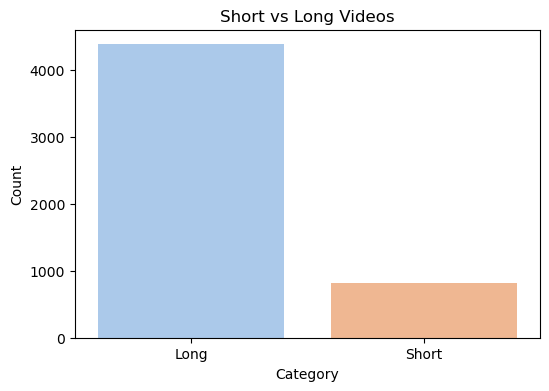

In [60]:
# Count of Short vs Long videos
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='pastel')
plt.title('Short vs Long Videos')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


## Research Questions 

#### Create TitleLength Column

In [63]:
# TitleLength = number of characters in title
df['TitleLength'] = df['title'].apply(lambda x: len(x) if pd.notna(x) else 0)


#### Create PublishedDayOfWeek and PublishedHour Columns

In [64]:
# Convert publishedAt to datetime format
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract Day of the Week (Monday, Tuesday, etc.)
df['PublishedDayOfWeek'] = df['publishedAt'].dt.day_name()

# Extract Hour of Publishing (0 to 23)
df['PublishedHour'] = df['publishedAt'].dt.hour


In [65]:
df.head()

,video_id,title,description,tags,publishedAt,thumbnails,liveBroadcastContent,viewCount,likeCount,commentCount,duration,TagsCount,DurationSeconds,Category,TitleLength,PublishedDayOfWeek,PublishedHour
0,KQ2a4uawQBo,Meet THE REAL Honey Singh | Yo Yo Honey Singh:...,Honey Singh shares his battles with mental hea...,"['angreji beat', 'dope shope', 'honey singh', ...",2024-12-20 08:00:00+00:00,{'default': {'url': 'https://i.ytimg.com/vi/KQ...,none,52864,7111.0,394.0,PT1M11S,19,71,Long,81,Friday,8
1,bOR7S0j_wq8,⁠Akshay Kumar ALMOST Gets Caught Cheating! 👀 f...,Brb taking notes on how to lie like a pro 👀\r\...,"['aditya seal', 'akshay kumar', 'akshay kumar ...",2024-12-19 12:30:00+00:00,{'default': {'url': 'https://i.ytimg.com/vi/bO...,none,44300,642.0,30.0,PT3M2S,23,182,Long,92,Thursday,12
2,GRM8Q-1fVJ0,Black Warrant | Official Teaser | Vikramaditya...,"India ki sabse khatarnaak jail mein, ek naya j...","['netflix india', 'netflix', 'netflix shows', ...",2024-12-19 05:30:10+00:00,{'default': {'url': 'https://i.ytimg.com/vi/GR...,none,201087,3300.0,101.0,PT1M15S,30,75,Long,96,Thursday,5
3,b0b8WBglCHo,The Electric State | Official Trailer | Netfli...,"In the aftermath of the robot war, the only pa...","['AGBO', 'Action', 'Adventure', 'Anthony Russo...",2024-12-18 14:30:00+00:00,{'default': {'url': 'https://i.ytimg.com/vi/b0...,none,19642,354.0,25.0,PT1M44S,20,104,Long,53,Wednesday,14
4,QCPOl_7cdnQ,The Electric State | Official Trailer | Hindi ...,"In the aftermath of the robot war, the only pa...","['AGBO', 'Netflix', 'Netflix पर क्या देखना चाह...",2024-12-18 13:30:05+00:00,{'default': {'url': 'https://i.ytimg.com/vi/QC...,none,117292,3455.0,130.0,PT1M41S,20,101,Long,61,Wednesday,13


#### Does the duration of the video influence the views and comments?

Correlation between DurationSeconds and ViewCount: 0.0009156761190475059
Correlation between DurationSeconds and CommentCount: 0.0561615477811457


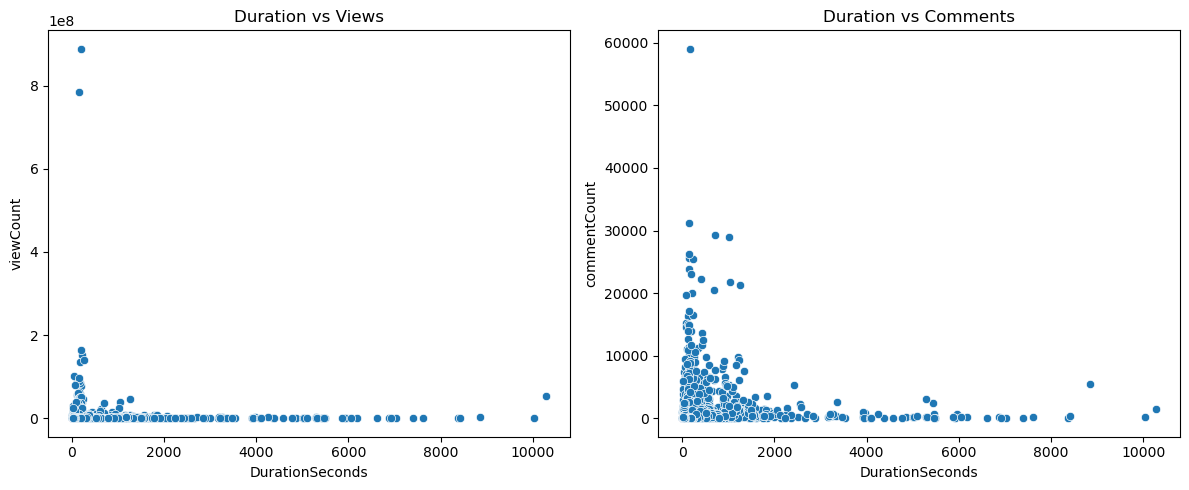

In [66]:
# Correlation check
print("Correlation between DurationSeconds and ViewCount:", df['DurationSeconds'].corr(df['viewCount']))
print("Correlation between DurationSeconds and CommentCount:", df['DurationSeconds'].corr(df['commentCount']))

# Scatter plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='DurationSeconds', y='viewCount', data=df)
plt.title('Duration vs Views')

plt.subplot(1,2,2)
sns.scatterplot(x='DurationSeconds', y='commentCount', data=df)
plt.title('Duration vs Comments')

plt.tight_layout()
plt.show()


## Key Insights
#### Shorter videos (within 5–25 minutes) dominate in terms of both views and comments.

#### Duration alone doesn't determine success — other factors (content quality, timing, tags, title, audience) might play a much bigger role.

#### Long videos (>30 minutes) tend to have lower engagement unless they are exceptional (some outliers exist).

#### You should not rely on making longer videos hoping to get more views/comments based on this data.

## Is there a relation between the views and comments?

Correlation between ViewCount and CommentCount: 0.14286115445027492


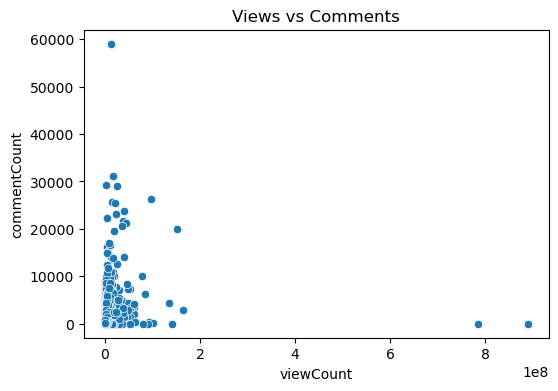

In [68]:
print("Correlation between ViewCount and CommentCount:", df['viewCount'].corr(df['commentCount']))

# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='viewCount', y='commentCount', data=df)
plt.title('Views vs Comments')
plt.show()


## Does tag count matter to get more views?

Correlation between TagsCount and ViewCount: 0.007305145502478774


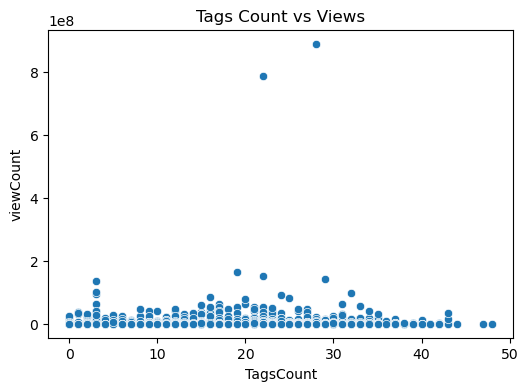

In [69]:
print("Correlation between TagsCount and ViewCount:", df['TagsCount'].corr(df['viewCount']))

# Scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='TagsCount', y='viewCount', data=df)
plt.title('Tags Count vs Views')
plt.show()


## Does video publishing day or time influence the engagement?

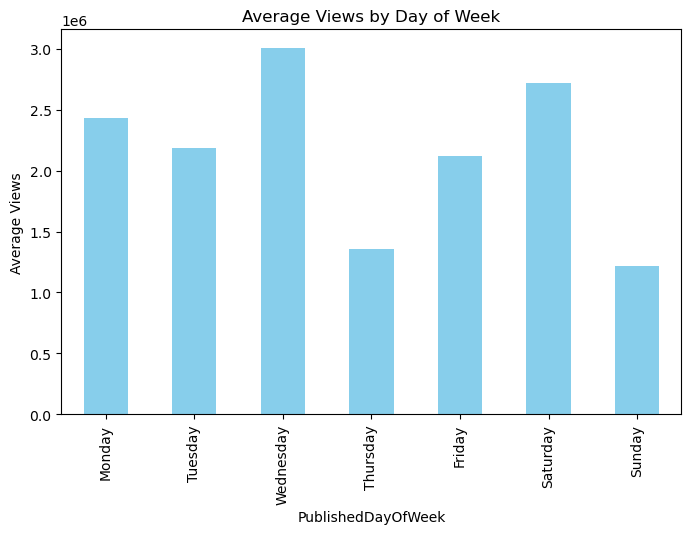

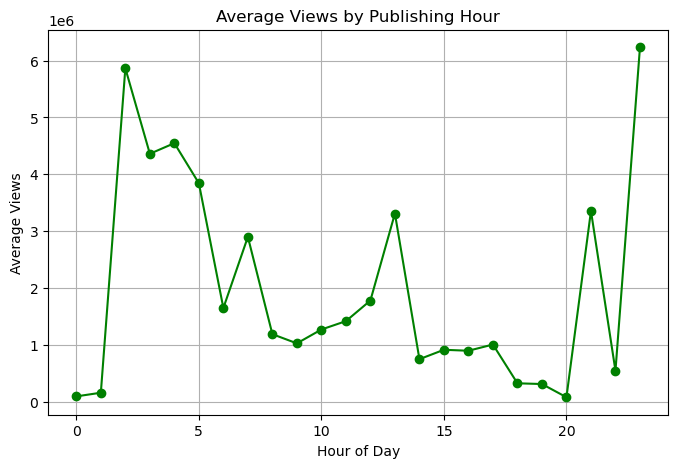

In [70]:
# Views by Day of Week
views_by_day = df.groupby('PublishedDayOfWeek')['viewCount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

views_by_day.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Average Views by Day of Week')
plt.ylabel('Average Views')
plt.show()

# Views by Hour
views_by_hour = df.groupby('PublishedHour')['viewCount'].mean()
views_by_hour.plot(kind='line', figsize=(8,5), marker='o', color='green')
plt.title('Average Views by Publishing Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.grid()
plt.show()


## Which video is most popular and why?

In [72]:
# 📈 Most Popular Video Analysis

# Find the top video based on view count
top_video = df.sort_values('viewCount', ascending=False).iloc[0]

# Display the details nicely
print(f"🎬 **Most Popular Video Details**")
print("-" * 40)
print(f"Title               : {top_video['title']}")
print(f"Views               : {top_video['viewCount']:,}")
print(f"Duration (seconds)  : {top_video['DurationSeconds']} seconds")
print(f"Tags                : {top_video['tags']}")
print(f"Published On        : {top_video['PublishedDayOfWeek']} at {top_video['PublishedHour']}:00 hrs")
print(f"Title Length        : {top_video['TitleLength']} characters")
print(f"Category            : {top_video['Category']}")
print("-" * 40)


🎬 **Most Popular Video Details**
----------------------------------------
Title               : Mighty Little Bheem | Bheem with a Beat | Netflix India
Views               : 888,330,690
Duration (seconds)  : 196 seconds
Tags                : ['Adventure', 'Indian', 'videos', 'animated shows on netflix', 'Jungle', 'funny kids shows', 'Videos for kids', 'show', 'Animals', 'mighty little bheem clips', 'Cartoon', 'Mighty Little Bheem', 'Drums', 'Indian shows for kids', 'kid series on netflix', 'comedy videos', 'funny videos', 'kids series', 'netflix india orignals', 'mighty little bheem', 'Kids', 'netflix india animated series', 'kids shows on netflix', 'clips', 'netflix kids', 'animation', 'mighty bheem videos', 'Shows for kids']
Published On        : Wednesday at 13:00 hrs
Title Length        : 55 characters
Category            : Long
----------------------------------------


## Does title length influence views?

Correlation between TitleLength and ViewCount: 0.003942875141989877


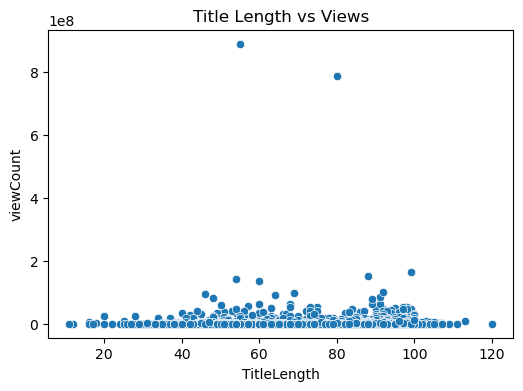

In [73]:
print("Correlation between TitleLength and ViewCount:", df['TitleLength'].corr(df['viewCount']))

plt.figure(figsize=(6,4))
sns.scatterplot(x='TitleLength', y='viewCount', data=df)
plt.title('Title Length vs Views')
plt.show()


## What is our views distribution (all videos)?

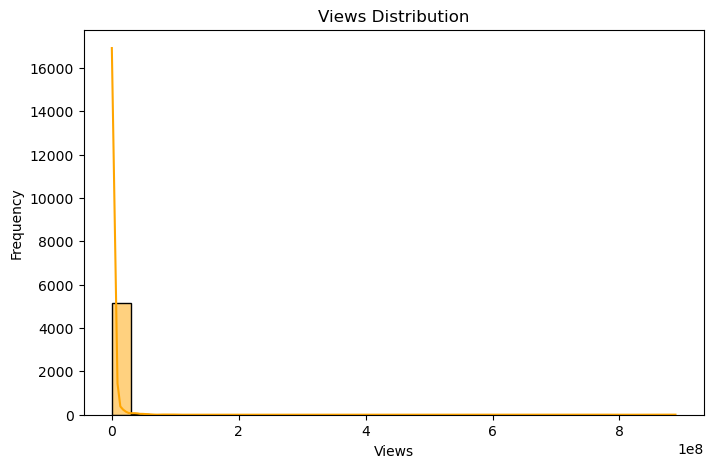

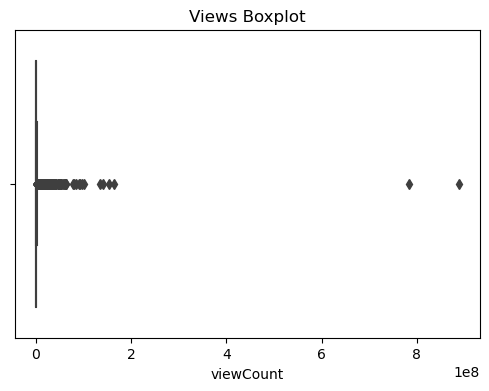

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(df['viewCount'], bins=30, kde=True, color='orange')
plt.title('Views Distribution')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

# Also boxplot to see outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['viewCount'])
plt.title('Views Boxplot')
plt.show()


## Are there topics/themes that consistently perform better?

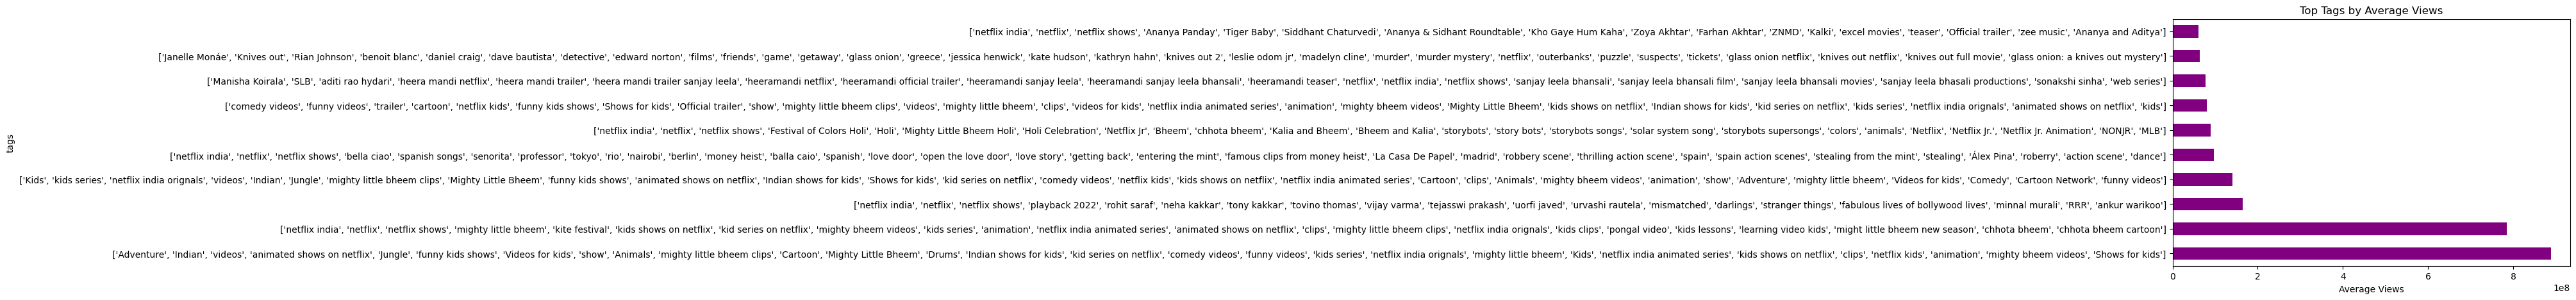

In [78]:
# Explode tags into rows
tags_exploded = df.explode('tags')

# Group by tag and average views
top_tags = tags_exploded.groupby('tags')['viewCount'].mean().sort_values(ascending=False).head(10)
top_tags.plot(kind='barh', figsize=(8,5), color='purple')
plt.title('Top Tags by Average Views')
plt.xlabel('Average Views')


plt.savefig('top_tags_by_average_views.png')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\3031128572.py:24: UserWarning: Glyph 2319 (\N{DEVANAGARI LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\3031128572.py:24: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\3031128572.py:24: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.tight_layout()
C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\3031128572.py:24: UserWarning: Glyph 2341 (\N{DEVANAGARI LETTER THA}) missing from current font.
  plt.tight_layout()
C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\3031128572.py:24: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  plt.tight_layout()
C:\Users\shiva\AppData\Local\Temp\ipykernel_19136\3031128572.py:24: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout

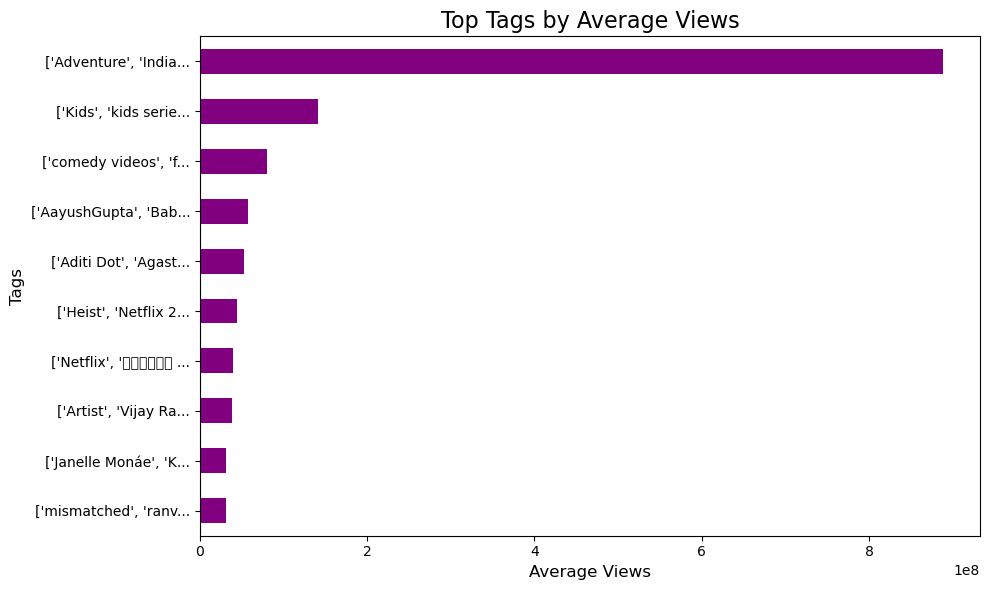

In [80]:
# Explode tags into rows
tags_exploded = df.explode('tags')

# CLEAN the 'tags' column:
# - If tag is a list, join elements into one string
# - Then, if string is too long, cut it to 20 characters
tags_exploded['tags'] = tags_exploded['tags'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
tags_exploded['tags'] = tags_exploded['tags'].apply(lambda x: x[:20] + '...' if isinstance(x, str) and len(x) > 20 else x)

# Group by cleaned tag and calculate average views
top_tags = tags_exploded.groupby('tags')['viewCount'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))  # bigger figure
top_tags.plot(kind='barh', color='purple')
plt.title('Top Tags by Average Views', fontsize=16)
plt.xlabel('Average Views', fontsize=12)
plt.ylabel('Tags', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()

# Save and show
plt.tight_layout()
plt.savefig('top_tags_cleaned_final.png')
plt.show()


## Any videos with no tags but performed well?

In [82]:
# Select videos with no tags and sort by viewCount
no_tags = df[df['TagsCount'] == 0].sort_values('viewCount', ascending=False)

# Print nicely
print("\nTop Videos Without Tags:\n" + "-"*30)
for idx, row in no_tags[['title', 'viewCount']].head(5).iterrows():
    print(f"Title: {row['title']}\nViews: {row['viewCount']:,}\n" + "-"*30)



Top Videos Without Tags:
------------------------------
Title: Heating Up | Netflix
Views: 24,051,981
------------------------------
Title: Ghoul - Silent Trailer I Netflix I HD
Views: 18,523,444
------------------------------
Title: Ghoul: The Room | Official [VR] | Netflix
Views: 18,407,319
------------------------------
Title: To-Dos | Netflix
Views: 4,419,563
------------------------------
Title: Ad Break | Netflix
Views: 3,582,965
------------------------------


## What is the frequency of video publishing?

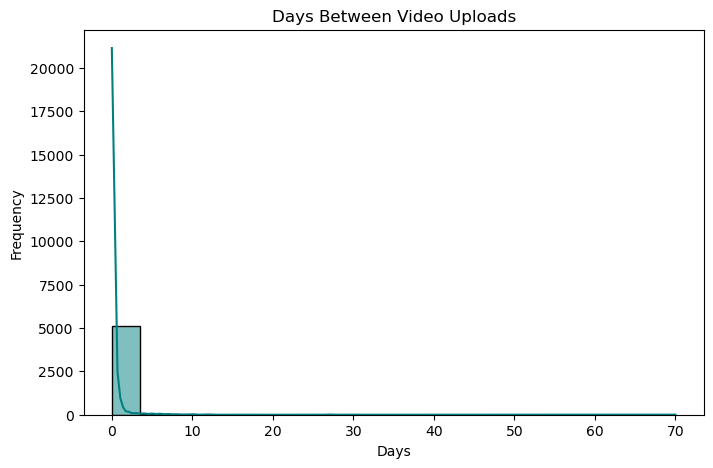

In [83]:
# Sort by publish date
df_sorted = df.sort_values('publishedAt')

# Calculate gap between videos
df_sorted['PublishedAtDate'] = pd.to_datetime(df_sorted['publishedAt'])
df_sorted['DaysSinceLastVideo'] = df_sorted['PublishedAtDate'].diff().dt.days

plt.figure(figsize=(8,5))
sns.histplot(df_sorted['DaysSinceLastVideo'].dropna(), bins=20, kde=True, color='teal')
plt.title('Days Between Video Uploads')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


## What are the keywords we used the most in tags?

In [88]:
from collections import Counter

# First, make sure tags are properly split into list
def split_tags(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        return [tag.strip() for tag in x.split(',')]
    else:
        return []

df['tags'] = df['tags'].apply(split_tags)

# Now flatten all tags
all_tags = []
for tags_list in df['tags']:
    all_tags.extend(tags_list)

# Count tags
tags_counter = Counter(all_tags)

# Show top 10 tags
top_tags = tags_counter.most_common(10)
for tag, count in top_tags:
    print(f"{tag}: {count} times")


'netflix': 2861 times
['netflix india': 2458 times
'netflix shows': 2297 times
'Netflix': 656 times
'netflix india': 545 times
'Netflix India': 436 times
'netflix shows']: 389 times
'netflix movies': 190 times
'kapil sharma': 164 times
'ranbir kapoor': 160 times


## What is the most used keyword in YT titles?

In [87]:
# Tokenize titles
all_words = []

for title in df['title']:
    if pd.notnull(title):
        words = re.findall(r'\w+', title.lower())  # Simple word split and lowercase
        all_words.extend(words)

# Remove common stopwords manually
stopwords = ['the', 'a', 'on', 'of', 'and', 'in', 'to', 'is', 'only', 'with', 'for']
filtered_words = [word for word in all_words if word not in stopwords]

# Count words
words_counter = Counter(filtered_words)

# Format output
print("\nTop 10 Most Common Words:\n" + "-"*30)
for word, count in words_counter.most_common(10):
    print(f"{word:<15} | {count:>5}")
print("-"*30)



Top 10 Most Common Words:
------------------------------
netflix         |  3913
india           |  3308
s               |   870
trailer         |   768
official        |   751
ft              |   614
2               |   362
kapoor          |   337
season          |   317
more            |   262
------------------------------


## Top 5 video titles that crossed 1 Million views

In [90]:
# Get top 5 videos with more than 1 million views (sorted by views)
top_5_videos = videos_over_1m.sort_values('viewCount', ascending=False).head(5)

# Display the titles and their views
top_5_videos[['title', 'viewCount']]


,title,viewCount
4916,Mighty Little Bheem | Bheem with a Beat | Netf...,888330690
3896,Bheem Cooks The Best Pongal | Mighty Little Bh...,784558766
2160,Exclusive Deleted Scenes: Netflix Playback 202...,164219558
1956,Janiye | Music Video | Chor Nikal Ke Bhaga | V...,152448025
4909,Mighty Little Bheem | Flower Adventure | Netfl...,141015327



# Final Thoughts:

### Overall conclusion from the project, summarizing what Netflix India can take away from the analysis to optimize their YouTube presence.

